#**Regresión Lineal Múltiple**



## Elementos Importantes de la RLM:

*   Método de regresión que presenta la relación entre una variable dependiente y varias variables explicativas independientes
*   Se establece la minimización de los residuos para ajustar los parámetros del modelo
*   En este desarrollo se presentará la minimización por mínimos cuadrados
*   Considera presupuestos cómo : valor esperado 0 de los errores, varianza de los errores constate, distribución normal de los errores

## **1. Fundamentación**

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

## Cargamos dataset Boston

Vamos a generar un modelo que permita obtener una predicción del costo de una vivienda en Bostón a partir de ciertas varialbes independientes

In [5]:
# Cargamos el dataset
boston_dataset = datasets.load_boston()

In [6]:
# Creamos un dataframe de pandas con los datos del dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# Seleccionamos las variables dependientes para el modelo
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM'], boston['NOX'], boston['TAX'], boston['DIS']], columns = ['LSTAT','RM','NOX','TAX','DIS'])
Y = boston_dataset.target
X.head()

,LSTAT,RM,NOX,TAX,DIS
0,4.98,6.575,0.538,296.0,4.0900
1,9.14,6.421,0.469,242.0,4.9671
2,4.03,7.185,0.469,242.0,4.9671
3,2.94,6.998,0.458,222.0,6.0622
4,5.33,7.147,0.458,222.0,6.0622


In [45]:
# Dividimos los datos en trian y test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
X_train.head()
print('Muestras de entrenamiento: ',X_train.shape[0])

Muestras de entrenamiento:  404


## Aplicamos el modelo de regresión lineal múltiple

El modelo que minimiza la suma de los cuadrados de los errores es:

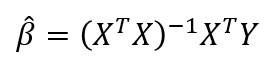

La matriz X que contiene las variables independientes tiene la forma:
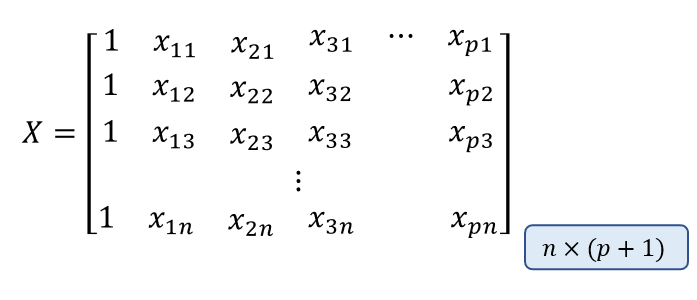

In [11]:
# Creamos un arreglo de números 1 y le agregamos la matriz X
c1_mat = np.array(np.ones((X_train.shape[0],1)))
X_mat = np.append(c1_mat,X_train.values,axis=1)

In [12]:
# Realizamos las operaciones del modelo
# Calculamos X transpuesta
X_matT =  X_mat.transpose()

# Calculamos la inversa de la multiplicación X*XT
X_inv = np.linalg.inv(np.matmul(X_matT,X_mat))

# Calculamos la multiplicación XT*Y
X_matTY = np.matmul(X_matT,Y_train)

# Finalmente encontramos los parámetros multiplicando los dos resultados anteriores
Beta = np.matmul(X_inv,X_matTY)

print('B0 = {}, B1 ={}, B2 = {}, B3 = {}, B4 = {}, B5 = {}'.format(Beta[0],Beta[1],Beta[2],Beta[3],Beta[4],Beta[5],))


B0 = 13.634894781940147, B1 =-0.7008653244375127, B2 = 4.476091463283882, B3 = -6.5053392579238505, B4 = -0.007625383265981833, B5 = -0.9686058048819248


In [13]:
# Probamos con una entrada nueva
# LSTAT = 18.35
# RM = 5.701
# NOX = 0.538
# TAX = 307
# DIS = 3.7872

x_in = np.array([1, 18.35,5.701	,0.538,	307.0,	3.7872])
MedV = np.dot(x_in,Beta)
MedV

16.783044423024915

## **2. Modelo usando Sklearn**

In [15]:
# Definimos el modelo
linear_model = LinearRegression()

In [16]:
# Realizamos el entrenamiento (Ajuste de parámeetros)
linear_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
# Identificamos los coeficientes
coeficientes = linear_model.coef_
intercepto = linear_model.intercept_

print('B0 = {}, B1 ={}, B2 = {}, B3 = {}, B4 = {}, B5 = {}'.format(intercepto,
                                                                   coeficientes[0],coeficientes[1],
                                                                   coeficientes[2],coeficientes[3],
                                                                   coeficientes[4],))

B0 = 13.634894781946675, B1 =-0.7008653244375374, B2 = 4.476091463283327, B3 = -6.505339257929595, B4 = -0.007625383265980723, B5 = -0.968605804882066


In [42]:
# Probamos con una entrada nueva
# LSTAT = 18.35
# RM = 5.701
# NOX = 0.538
# TAX = 307
# DIS = 3.7872
x_in = np.array([18.35,5.701	,0.538,	307.0,	3.7872])
MedV = linear_model.predict(x_in.reshape((1, X_test.shape[1])))
MedV

array([16.78304442])

In [43]:
# Evaluamos el desempeño
R2 = linear_model.score(X_test,Y_test)
y_test_predict = linear_model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

print("coeficiente de determinación R^2: ", R2)
print('Rmse ',RMSE)

coeficiente de determinación R^2:  0.713976177826621
Rmse  4.732220575961914
